In [409]:
#!pip install pyspark
%pip install scikit-learn
%pip install sklearn
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
#from sklearn.metrics import confusion_matrix
#from pyspark.sql.functions import *
#from pyspark.sql import SparkSession
#from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler, VectorSlicer
#from pyspark.ml.functions import vector_to_array
#from pyspark.sql.functions import col, to_date, year, to_timestamp, month, lit
#from pyspark.sql.functions import countDistinct 
#from pyspark.sql.functions import when


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [410]:
#Location of train and test files
data_loc = "C:/Users/Y9FHP3726/Desktop/DiplomaThesis/preprocessed_data_date_formatted.csv"

# read the CSV file into a Pandas DataFrame
dataset = pd.read_csv(data_loc)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print(dataset.head(10))


   fetch_date  country  sex  age  new_cust  cust_seniority  indrel  \
0  2015-01-28        1    1   35         0               6       1   
1  2015-01-28        1    0   23         0              35       1   
2  2015-01-28        1    1   23         0              35       1   
3  2015-01-28        1    1   23         0              35       1   
4  2015-01-28        1    1   65         0              35       1   
5  2015-01-28        1    0   23         0              35       1   
6  2015-01-28        1    0   23         0              35       1   
7  2015-01-28        1    0   24         0              35       1   
8  2015-01-28        1    1   22         0              35       1   
9  2015-01-28        1    0   28         0              35       1   

   residence_index  foreigner_index  deceased  activity_index     income  \
0                1                0         0               1   87218.10   
1                1                0         0               1       0.00   
2

In [411]:
print(len(dataset))

6137200


# **apo edw kai katw koitazw diafora aspects gia kathe column tou dataset**

In [412]:
'''
#INFO GIA XWRES
country_df=dataset.select('country').filter(col("country") != lit("ES"))
distinct_value_count = country_df.select(countDistinct("country")).first()[0]
print(distinct_value_count)'''

'\n#INFO GIA XWRES\ncountry_df=dataset.select(\'country\').filter(col("country") != lit("ES"))\ndistinct_value_count = country_df.select(countDistinct("country")).first()[0]\nprint(distinct_value_count)'

In [413]:
'''
#INFO GIA EMP_INDEX
emp_index_df=dataset.select('emp_index')
distinct_value_count = emp_index_df.select(countDistinct("emp_index")).first()[0]
print(distinct_value_count)
emp_index_df=dataset.select('emp_index').distinct().filter(col("emp_index")!= lit('N'))
emp_index_df.show()
'''


'\n#INFO GIA EMP_INDEX\nemp_index_df=dataset.select(\'emp_index\')\ndistinct_value_count = emp_index_df.select(countDistinct("emp_index")).first()[0]\nprint(distinct_value_count)\nemp_index_df=dataset.select(\'emp_index\').distinct().filter(col("emp_index")!= lit(\'N\'))\nemp_index_df.show()\n'

In [414]:
'''#INFO GIA sex
sex_df=dataset.select('sex')
distinct_value_count = sex_df.select(countDistinct("sex")).first()[0]
print(distinct_value_count)
#sex_df=dataset.select('sex').distinct().filter(col("emp_index")!= lit('N'))
#sex_df.show()'''

'#INFO GIA sex\nsex_df=dataset.select(\'sex\')\ndistinct_value_count = sex_df.select(countDistinct("sex")).first()[0]\nprint(distinct_value_count)\n#sex_df=dataset.select(\'sex\').distinct().filter(col("emp_index")!= lit(\'N\'))\n#sex_df.show()'

In [415]:
'''#INFO GIA new_cust
new_cust_df=dataset.select('new_cust')
distinct_value_count = new_cust_df.select(countDistinct("new_cust")).first()[0]
print(distinct_value_count)
new_cust_df=dataset.select('new_cust').distinct()
new_cust_df.show()'''

'#INFO GIA new_cust\nnew_cust_df=dataset.select(\'new_cust\')\ndistinct_value_count = new_cust_df.select(countDistinct("new_cust")).first()[0]\nprint(distinct_value_count)\nnew_cust_df=dataset.select(\'new_cust\').distinct()\nnew_cust_df.show()'

In [416]:
'''#INFO GIA cust_seniority
cust_seniority_df=dataset.select('cust_seniority')
distinct_value_count = cust_seniority_df.select(countDistinct("cust_seniority")).first()[0]
print(distinct_value_count)
cust_seniority_df=dataset.select('cust_seniority').distinct()
cust_seniority_df.show()'''

'#INFO GIA cust_seniority\ncust_seniority_df=dataset.select(\'cust_seniority\')\ndistinct_value_count = cust_seniority_df.select(countDistinct("cust_seniority")).first()[0]\nprint(distinct_value_count)\ncust_seniority_df=dataset.select(\'cust_seniority\').distinct()\ncust_seniority_df.show()'

In [417]:
'''#INFO GIA indrel
indrel=dataset.select('indrel')
distinct_value_count = indrel.select(countDistinct("indrel")).first()[0]
print(distinct_value_count)
indrel=dataset.select('indrel').distinct()
indrel.show()'''

'#INFO GIA indrel\nindrel=dataset.select(\'indrel\')\ndistinct_value_count = indrel.select(countDistinct("indrel")).first()[0]\nprint(distinct_value_count)\nindrel=dataset.select(\'indrel\').distinct()\nindrel.show()'

In [418]:
'''#INFO GIA last_date_as_primary
last_date_as_primary=dataset.select('last_date_as_primary')
distinct_value_count = last_date_as_primary.select(countDistinct("last_date_as_primary")).first()[0]
print(distinct_value_count)
last_date_as_primary=dataset.select('last_date_as_primary').distinct()
last_date_as_primary.show()'''

'#INFO GIA last_date_as_primary\nlast_date_as_primary=dataset.select(\'last_date_as_primary\')\ndistinct_value_count = last_date_as_primary.select(countDistinct("last_date_as_primary")).first()[0]\nprint(distinct_value_count)\nlast_date_as_primary=dataset.select(\'last_date_as_primary\').distinct()\nlast_date_as_primary.show()'

In [419]:
'''#INFO GIA cust_type
cust_type=dataset.select('cust_type')
distinct_value_count = cust_type.select(countDistinct("cust_type")).first()[0]
print(distinct_value_count)
cust_type=dataset.select('cust_type').distinct()
cust_type.show() '''

'#INFO GIA cust_type\ncust_type=dataset.select(\'cust_type\')\ndistinct_value_count = cust_type.select(countDistinct("cust_type")).first()[0]\nprint(distinct_value_count)\ncust_type=dataset.select(\'cust_type\').distinct()\ncust_type.show() '

In [420]:
'''#INFO GIA cust_rel
cust_rel=dataset.select('cust_rel')
distinct_value_count = cust_rel.select(countDistinct("cust_rel")).first()[0]
print(distinct_value_count)
cust_rel=dataset.select('cust_rel').distinct()
cust_rel.show() '''

'#INFO GIA cust_rel\ncust_rel=dataset.select(\'cust_rel\')\ndistinct_value_count = cust_rel.select(countDistinct("cust_rel")).first()[0]\nprint(distinct_value_count)\ncust_rel=dataset.select(\'cust_rel\').distinct()\ncust_rel.show() '

In [421]:
''' #INFO GIA residence_index
residence_index=dataset.select('residence_index')
distinct_value_count = residence_index.select(countDistinct("residence_index")).first()[0]
print(distinct_value_count)
residence_index=dataset.select('residence_index').distinct()
residence_index.show() '''

' #INFO GIA residence_index\nresidence_index=dataset.select(\'residence_index\')\ndistinct_value_count = residence_index.select(countDistinct("residence_index")).first()[0]\nprint(distinct_value_count)\nresidence_index=dataset.select(\'residence_index\').distinct()\nresidence_index.show() '

In [422]:
 '''#INFO GIA foreigner_index
foreigner_index=dataset.select('foreigner_index')
distinct_value_count = foreigner_index.select(countDistinct("foreigner_index")).first()[0]
print(distinct_value_count)
foreigner_index=dataset.select('foreigner_index').distinct()
foreigner_index.show() '''

'#INFO GIA foreigner_index\nforeigner_index=dataset.select(\'foreigner_index\')\ndistinct_value_count = foreigner_index.select(countDistinct("foreigner_index")).first()[0]\nprint(distinct_value_count)\nforeigner_index=dataset.select(\'foreigner_index\').distinct()\nforeigner_index.show() '

In [423]:
 '''#INFO GIA spouse_index
spouse_index=dataset.select('spouse_index')
distinct_value_count = spouse_index.select(countDistinct("spouse_index")).first()[0]
print(distinct_value_count)
spouse_index=dataset.select('spouse_index').distinct()
spouse_index.show() '''

'#INFO GIA spouse_index\nspouse_index=dataset.select(\'spouse_index\')\ndistinct_value_count = spouse_index.select(countDistinct("spouse_index")).first()[0]\nprint(distinct_value_count)\nspouse_index=dataset.select(\'spouse_index\').distinct()\nspouse_index.show() '

In [424]:
 '''#INFO GIA joining_channel
joining_channel=dataset.select('joining_channel')
distinct_value_count = joining_channel.select(countDistinct("joining_channel")).first()[0]
print(distinct_value_count)
joining_channel=dataset.select('joining_channel').distinct()
joining_channel.show() '''

'#INFO GIA joining_channel\njoining_channel=dataset.select(\'joining_channel\')\ndistinct_value_count = joining_channel.select(countDistinct("joining_channel")).first()[0]\nprint(distinct_value_count)\njoining_channel=dataset.select(\'joining_channel\').distinct()\njoining_channel.show() '

In [425]:
 '''#INFO GIA deceased
deceased=dataset.select('deceased')
distinct_value_count = deceased.select(countDistinct("deceased")).first()[0]
print(distinct_value_count)
deceased=dataset.select('deceased').distinct()
deceased.show() '''

'#INFO GIA deceased\ndeceased=dataset.select(\'deceased\')\ndistinct_value_count = deceased.select(countDistinct("deceased")).first()[0]\nprint(distinct_value_count)\ndeceased=dataset.select(\'deceased\').distinct()\ndeceased.show() '

In [426]:
 '''#INFO GIA address_type
address_type=dataset.select('address_type')
distinct_value_count = address_type.select(countDistinct("address_type")).first()[0]
print(distinct_value_count)
address_type=dataset.select('address_type').distinct()
address_type.show() '''

'#INFO GIA address_type\naddress_type=dataset.select(\'address_type\')\ndistinct_value_count = address_type.select(countDistinct("address_type")).first()[0]\nprint(distinct_value_count)\naddress_type=dataset.select(\'address_type\').distinct()\naddress_type.show() '

In [427]:
 '''#INFO GIA prov_code
prov_code=dataset.select('prov_code')
distinct_value_count = prov_code.select(countDistinct("prov_code")).first()[0]
print(distinct_value_count)
prov_code=dataset.select('prov_code').distinct()
prov_code.show() '''

'#INFO GIA prov_code\nprov_code=dataset.select(\'prov_code\')\ndistinct_value_count = prov_code.select(countDistinct("prov_code")).first()[0]\nprint(distinct_value_count)\nprov_code=dataset.select(\'prov_code\').distinct()\nprov_code.show() '

In [428]:
 '''#INFO GIA activity_index
activity_index=dataset.select('activity_index')
distinct_value_count = activity_index.select(countDistinct("activity_index")).first()[0]
print(distinct_value_count)
activity_index=dataset.select('activity_index').distinct()
activity_index.show() '''

'#INFO GIA activity_index\nactivity_index=dataset.select(\'activity_index\')\ndistinct_value_count = activity_index.select(countDistinct("activity_index")).first()[0]\nprint(distinct_value_count)\nactivity_index=dataset.select(\'activity_index\').distinct()\nactivity_index.show() '

# **apo edw kai katw ksekinaw na ftiaxnw to dataset gia to peirama me to proion pou tha eisagei o xrhsths**


In [429]:
product = input("What product should I use to test the model? \n please type one of the following: savings_account, guarentees, current_account, derivative_account, payroll_account, junior_account, mas_account, perticular_account, perticular_plus, st_deposit, mt_deposits, lt_deposits, e_account, funds, mortgage, pension, loan, tax, credit_card, securities, home_account, payroll, pension2, direct_debit ")
print(type(product))
columns_to_drop=[
'savings_account',
 'guarentees', 
 'current_account',
 'derivative_account',
 'payroll_account',
 'junior_account', 
 'mas_account',
 'perticular_account',
 'perticular_plus',
 'st_deposit', 
 'mt_deposits',
 'lt_deposits',
 'e_account',
 'funds',
 'mortgage', 
 'pension', 
 'loan',
 'tax', 
 'credit_card',
 'securities',
 'home_account',
 'payroll',
 'pension2', 
 'direct_debit']
columns_to_drop.remove(product)


#ftiaxnw data
data=dataset.drop(columns=columns_to_drop) 
print('The  columns in data are\n',list(data.columns))
print('The no of columns in data are\n',len(data.columns))

<class 'str'>
The  columns in data are
 ['fetch_date', 'country', 'sex', 'age', 'new_cust', 'cust_seniority', 'indrel', 'residence_index', 'foreigner_index', 'deceased', 'activity_index', 'income', 'credit_card', 'emp_index_D', 'emp_index_B', 'emp_index_C', 'emp_index_A', 'emp_index_E', 'cust_type_1', 'cust_type_3', 'cust_type_2', 'cust_rel_I', 'cust_rel_A', 'cust_rel_P', 'segmentation_2', 'segmentation_3', 'segmentation_1']
The no of columns in data are
 27


# **APO AUTO TO CELL kai katw TREKSE GIA NA ALLAZEIS TA NO OF ITERS TOU ALGORITHM**

In [430]:
print(dataset.dtypes)

fetch_date             object
country                 int64
sex                     int64
age                     int64
new_cust                int64
cust_seniority          int64
indrel                  int64
residence_index         int64
foreigner_index         int64
deceased                int64
activity_index          int64
income                float64
savings_account         int64
guarentees              int64
current_account         int64
derivative_account      int64
payroll_account         int64
junior_account          int64
mas_account             int64
perticular_account      int64
perticular_plus         int64
st_deposit              int64
mt_deposits             int64
lt_deposits             int64
e_account               int64
funds                   int64
mortgage                int64
pension                 int64
loan                    int64
tax                     int64
credit_card             int64
securities              int64
home_account            int64
payroll   

In [431]:
#==============================================================================================================
#epilegw ws train ta rows tou data me fetch_date=2015-01-28
#epilegw ws test ta rows tou data me fetch_date=2015-02-28

train = data[data['fetch_date'] == "2015-01-28"]

test = data[data['fetch_date'] == "2015-02-28"]

print('train is:')
print(train.head(5))
print('============================================================================================================')


print('test is:')
print(test.head(5))
print('============================================================================================================')


#now delete fetc_date column from train and test dataset
train=train.drop(columns='fetch_date') 
test=test.drop(columns='fetch_date') 


print('AFTER DELETION OF fetch_date COLUMN:')
print('train is:')
print(train.head(5))
print('============================================================================================================')


print('test is:')
print(test.head(5))
print('============================================================================================================')


#!!!I NOW CAST EVERY COLUMN TO BE INT IN ORDER TO RUN MY LOGISTIC REGRESSION!!!
train = train.astype(int)
print('AFTER casting every column to int:')
print('train is:')
print(train.head(5))
print('============================================================================================================')


test = test.astype(int)
print('test is:')
print(test.head(5))

train is:
   fetch_date  country  sex  age  new_cust  cust_seniority  indrel  \
0  2015-01-28        1    1   35         0               6       1   
1  2015-01-28        1    0   23         0              35       1   
2  2015-01-28        1    1   23         0              35       1   
3  2015-01-28        1    1   23         0              35       1   
4  2015-01-28        1    1   65         0              35       1   

   residence_index  foreigner_index  deceased  activity_index     income  \
0                1                0         0               1   87218.10   
1                1                0         0               1       0.00   
2                1                0         0               1  113316.66   
3                1                0         0               1  113538.81   
4                1                0         0               1   61605.09   

   credit_card  emp_index_D  emp_index_B  emp_index_C  emp_index_A  \
0            0          1.0          0.0  

In [432]:
print('The number of users in train data that own ',product, ' as a product  are:')
a=train[train[product] == 1]
print(len(a))
print('out of: ')
print(len(train))

The number of users in train data that own  credit_card  as a product  are:
34755
out of: 
329495


In [433]:
print('The number of users in test data that own ',product, ' as a product  are:')
b=test[test[product] == 1]
print(len(b))
print('out of: ')
print(len(test))

The number of users in test data that own  credit_card  as a product  are:
33606
out of: 
332650


# **An xreiazetai na kanw balance to dataset gia kapoio proion tote trexw ton kwdika sto epomeno kai methepomeno cell alliws ton afhnw commented**

In [434]:
'''# for balance of train dataset
num_rows_to_keep = len(a)
num_zero_rows = len(train[train[product]==0])
num_non_zero_rows = len(train[train[product]!=0])
df_zero = train[train[product] == 0].sample(n=num_rows_to_keep, random_state=42)
df_non_zero = train[train[product] != 0].sample(n=num_rows_to_keep, random_state=42)
train_balanced = pd.concat([df_zero, df_non_zero], ignore_index=True)
train_balanced = train_balanced.sample(frac=1, random_state=42) # set random_state for reproducibility


print('The number of users in balanced_train data that own ',product, ' as a product  are:')
a_bal=train_balanced[train_balanced[product] == 1]
print(len(a_bal))
print('out of: ')
print(len(train_balanced))
print('============================================================================')
print(train_balanced.head(5))
train=train_balanced'''

"# for balance of train dataset\nnum_rows_to_keep = len(a)\nnum_zero_rows = len(train[train[product]==0])\nnum_non_zero_rows = len(train[train[product]!=0])\ndf_zero = train[train['credit_card'] == 0].sample(n=num_rows_to_keep, random_state=42)\ndf_non_zero = train[train['credit_card'] != 0].sample(n=num_rows_to_keep, random_state=42)\ntrain_balanced = pd.concat([df_zero, df_non_zero], ignore_index=True)\ntrain_balanced = train_balanced.sample(frac=1, random_state=42) # set random_state for reproducibility\n\n\nprint('The number of users in balanced_train data that own ',product, ' as a product  are:')\na_bal=train_balanced[train_balanced[product] == 1]\nprint(len(a_bal))\nprint('out of: ')\nprint(len(train_balanced))\nprint('============================================================================')\nprint(train_balanced.head(5))\ntrain=train_balanced"

In [435]:
'''# for balance of test dataset
num_rows_to_keep = len(b)
num_zero_rows = len(test[test[product]==0])
num_non_zero_rows = len(test[test[product]!=0])
df_zero = test[test[product] == 0].sample(n=num_rows_to_keep, random_state=42)
df_non_zero = test[test[product] != 0].sample(n=num_rows_to_keep, random_state=42)
test_balanced = pd.concat([df_zero, df_non_zero], ignore_index=True)
test_balanced = test_balanced.sample(frac=1, random_state=42) # set random_state for reproducibility


print('The number of users in balanced_test data that own ',product, ' as a product  are:')
b_bal=test_balanced[test_balanced[product] == 1]
print(len(b_bal))
print('out of: ')
print(len(test_balanced))
print('============================================================================')
print(test_balanced.head(5))
test=test_balanced'''

"# for balance of test dataset\nnum_rows_to_keep = len(b)\nnum_zero_rows = len(test[test[product]==0])\nnum_non_zero_rows = len(test[test[product]!=0])\ndf_zero = test[test['credit_card'] == 0].sample(n=num_rows_to_keep, random_state=42)\ndf_non_zero = test[test['credit_card'] != 0].sample(n=num_rows_to_keep, random_state=42)\ntest_balanced = pd.concat([df_zero, df_non_zero], ignore_index=True)\ntest_balanced = test_balanced.sample(frac=1, random_state=42) # set random_state for reproducibility\n\n\nprint('The number of users in balanced_test data that own ',product, ' as a product  are:')\nb_bal=test_balanced[test_balanced[product] == 1]\nprint(len(b_bal))\nprint('out of: ')\nprint(len(test_balanced))\nprint('============================================================================')\nprint(test_balanced.head(5))\ntest=test_balanced"

# **TEST OF LOGISTIC REGRESSION**

In [436]:
from sklearn.linear_model import LogisticRegression

features_list=['country','sex','age','new_cust','cust_seniority','indrel','residence_index','foreigner_index','deceased','activity_index','income','emp_index_D','emp_index_B','emp_index_C','emp_index_A','emp_index_E','cust_type_1','cust_type_3','cust_type_2','cust_rel_I','cust_rel_A','cust_rel_P','segmentation_2','segmentation_3','segmentation_1']
# split the data into features (X) and target (y)
features_train = train[features_list]
target_train = train[product]

# create a LogisticRegression model
model = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=1000)

# fit the model to the data
model.fit(features_train, target_train)



LogisticRegression(max_iter=1000)

In [437]:
# make predictions on new data

features_test=test.drop(columns=product) 
target_test=test[product]

# predict class labels for the testing set
predictions = model.predict(features_test)

y_pred_prob = model.predict_proba(features_test)

# print the predicted values
print('The predictions are:')
print(predictions)


The predictions are:
[0 0 0 ... 0 0 0]


# **SKLEARN METRICS**

In [441]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, accuracy_score


# compute accuracy score
accuracy = accuracy_score(target_test, predictions)
print("Accuracy: {:.4f}".format(accuracy))

# compute precision score
precision = precision_score(target_test, predictions)
print("Precision: {:.4f}".format(precision))

# compute recall score
recall = recall_score(target_test, predictions)
print("Recall: {:.4f}".format(recall))

# compute AUC score
auc = roc_auc_score(target_test, y_pred_prob[:, 1])
print("ROC AUC on test data: {:.4f}".format(auc))


Accuracy: 0.8990
Precision: 0.0000
Recall: 0.0000
ROC AUC on test data: 0.4068


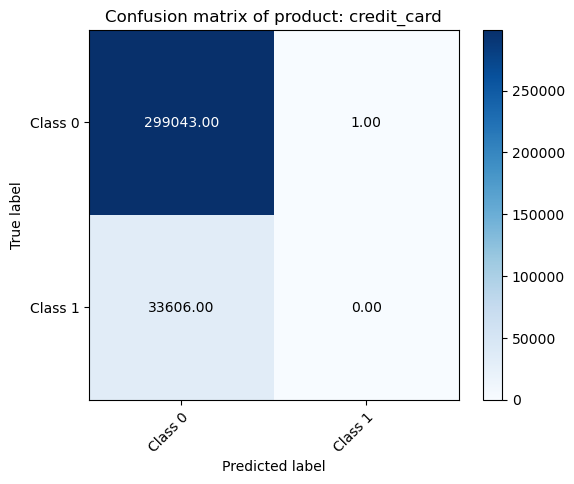

In [439]:
#CONFUSION MATRIX
from sklearn.metrics import  confusion_matrix
# Generate some example data
#y_true = np.array([0, 1, 0, 1, 1, 0, 0, 1])
#y_pred = np.array([1, 1, 0, 1, 0, 0, 1, 0])

#y_true = df.select(col(product)).flatMap(lambda x: x).collect()
#y_pred = df.select(col('prediction')).flatMap(lambda x: x).collect()
# Convert the list to a NumPy array
#y_true = np.array(y_true)
#y_pred = np.array(y_pred)

y_true = target_test
y_pred = predictions





# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

# Set the ticks and tick labels
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=['Class 0', 'Class 1'],
       yticklabels=['Class 0', 'Class 1'],
       title='Confusion matrix of product: '+product,
       ylabel='True label',
       xlabel='Predicted label')

# Rotate the tick labels and set their alignment
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations
fmt = '.2f'  # Format for displaying the numbers in the cells
thresh = cm.max() / 2.  # Threshold for coloring the cells
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

# Add a grid to the plot
ax.grid(False)

# Display the plot
plt.show()